<h1><center>Rent Price Prediction Model</center></h1>

# Abstract

Machine Learning techniques have been used to identify trends, correlations as well as predict future values especially when either are not immediately discernible. The work focuses on how accurately can Machine Learning techniques available be used to predict the rent prices given the crime rates and location coordinates for a place of residence. The crime data and rent data are obtained from two different sources and are merged using the location coordinates. Linear Regression, Random Forest, Neural Networks, and Support Vector Regression Algorithms are implemented to predict rent prices with respect 5 differnet types of inputs. The results illustrate that rent prices can be predicted with a high degree of accuracy using crime rates and location data as independent variables. An accuracy of 93.4% was achieved using Multi-Layer Perceptron.

# Introduction 

## Problem Identification

In urban areas, rent prices are influenced by a variety of factors: neighborhood, residents' socio-economic status, proximity to services, school's quality, crime rates, etc. A vast metropolis, Los Angeles thus serves as an ideal candidate for us to observe this relationship of cause and effect at play. A comparably high crime rate is a major concern for people living within this area as well. I was especially curious about how crime rates are influencing rent prices in this vicinity. Hence, in this project I will develop a predictive model that predicts house rent prices based on crime rates in that particular location using different Machine Learning Algorithms and try to identify the best preditctive model fitting the dataset with least error (MAE and RMSE). Using this model prospective residents would be able to estimate rental expenses in the locality. Additionally, this model would also help landlords at LA to quote a suitable rent price for their houses.

## Data Gathering

In order to understand the relationship between the rent price and the crime rate,implement feature engineering, two different datasets were used. A brief overview of the datasets is as follows:


### 1.	Crime Data from 2010 to 2019: 
This dataset was made available through the City of Los Angeles, via the Office of the Mayor. The data available here was extremely detailed and comprehensive and was meticulously kept up to date by the city, i.e. any and all reported crime between 2010 and 2019 was logged here and included information such as Date and Time of Occurrence, Area, Victim Age/Sex/Description, Crime Description, Location, Weapon Used, Crime Code etc. For the intents and purposes of this project, some of the information was out of the scope of work.
Briefly discussed below are the variables chosen for this project:
#### Date Of Occurrence
This shows the date of a recorded crime's occurrence. This was used to extract the year in which the crime was committed and then to combine it with the same year's rent listings (within a specified radius).
#### Crime Code Description
For each report logged, this would state the type of crime committed. There were 141 distinct codes of crime, and therefore 141 explanations of the crime code. Such details will later be used to decide the severity of each crime.
#### Latitude and Longitude
These variables state the latitude and longitude value of each crime reported. They would later be utilized to filter crimes occurring within a specified vicinity of a reported rent listing.

This data set can be found at:
https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-2019/63jg-8b9z/data 

### 2. Rent Price LA
The second dataset, Rent Price LA, prepared by USC Sol Price Center for Social Innovation provided median rent price data for the city of Los Angeles from the years 2006 to 2016. This dataset included information such as Year, Neighborhood, GEOID, Location, Date, Amount, Tract etc.
For this project, the following variables were chosen:
#### Year
This was the year of the rental listing. This would be used as a filter to merge with crimes that occurred during that year (within a specified vicinity).
#### Amount
This value was the median gross rent amount in US Dollars of a rental listing in the rent database. The median gross rent used here is the “measure of the average level of housing affordability in an area”. This would be our data label for the algorithms implemented.
#### Location
This variable stored the latitude and longitude value of the rental listing. The Latitude and Longitude values would be extracted and then used to merge with crime occurrences for a given year, if they occurred within a specified radius.
#### Neighborhood
This variable stored the name of the neighborhood for the rental listing. This variable was eventually ruled out from being used since there would be multiple and differing rent values from the same neighborhood and because the crime dataset and rent dataset would use different naming nomenclatures for the same neighborhood.
Since the crime dataset spanned from 2010 to 2019 and the rent dataset spanned from 2006 to 2016, the final database would span from 2010 to 2016.

This data set can be found at:
https://usc.data.socrata.com/Los-Angeles/Rent-Price-LA-/4a97-v5tx

## Algorithms Implemented
The following algorithms were used during this project for predictions:

### Linear Regression
The linear regression algorithm attempts to find a linear relationship between a single dependent variable and multiple independent variable.
### Random Forests
This approach uses a multitude of decision trees in order to achieve the regression problem objectives, but at the same time avoiding some of the constraints put forward by using decision trees alone.
### Support Vector Regression
SVRs use the same approach as Support Vector Machines, however, for regression problems as opposed to classification problems.
### Neural Networks
Neural Networks are a strongly connected network of perceptrons used to identify non-linear relationships and use that to predict outcomes. In our case we use a Multilayer Perceptron 

# Background and Terminologies

## Definitions
Mean Absolute Error (MAE) and Root
Mean Square Error (RMSE) functions were used to evaluate the results.

![title](1.png)
![title](2.png)

## Crime Scores
The crime dataset consists of a list of crimes with varying severity. Intuitively, it can be understood that the more serious the crime the higher it impacts the perception of security in a location. Based on, Matthew P J Ashby, Comparing Methods for Measuring Crime Harm/Severity, Policing: A Journal of Policy and Practice, Volume 12, Issue 4, December 2018, Pages 439–454, https://doi.org/10.1093/police/pax049, weights are assigned to every crime and an overall value is calculated for each location. Each crime in the crime dataset was compared with the list of Notifiable Offence List Categories and given the Crime Severity Score. The Crime Severity Score (CSS) is the score assigned to a crime based on the mean sentence passed on those who were convicted of the offense. Each score is normalized and the final crime values for each location is calculated using the dot product of the crime weight and the crime frequency matrices. Refer to Appendix A.

# IMPLEMENTATION

## Data Pre-Procesing and Feature Engineering

### Merging Datasets
The first task for pre-processing the data was to read the Rent Price LA dataset and extract only the variables needed for the data frame from the available list, i.e. Year, Amount, Location and Neighborhood. Subsequently, the location data was split into two, i.e. Latitude and Longitude, and the Location column was then removed.

After this, the Crime Data from 2010 to 2019 dataset was read and only the following variables for the data frame were extracted: Date of Occurrence, Crime Code Description, Latitude and Longitude. The first task for this dataset was to extract the Year value from the Date of Occurrence and save that as another variable.

The next task was to merge the two datasets, by obtaining a list of names of all the 141 unique crime descriptions from the crime data set and adding each as a column to the Rent Price LA data frame. Following this, the datasets were iterated over year by year, starting off with 2010 and ending at 2016. For a given datapoint in the Rent Price LA dataset, a filter of ± 0.005 degrees Latitude and Longitude of the given location was applied for the crime dataset. Iterating over each incident in the crime data subset, the frequency of each type of crime for that rent listing was incremented. Once completed, the data frame now provides a comprehensive view of all crimes in the vicinity of each listing as well as their frequencies. This data frame was saved as an intermediate database.

In [1]:
import pandas as pd
import os

LA_Rent_Data = pd.read_csv("Rent_Price__LA_.csv", usecols=["Year", "Amount", "Location", "Neighborhood"], skipinitialspace=True)

LA_Rent_Data[['LAT','LON']] = LA_Rent_Data.Location.str.split(", ",expand=True,)

LA_Rent_Data['LAT'] = LA_Rent_Data['LAT'].str.lstrip('(').astype(float)
LA_Rent_Data['LON'] = LA_Rent_Data['LON'].str.rstrip(')').astype(float)

LA_Rent_Data = LA_Rent_Data.drop("Location",axis=1)

year_filter = LA_Rent_Data.Year == 2010

LA_Rent_Data_sub = LA_Rent_Data[year_filter]

print(LA_Rent_Data.shape)
print(LA_Rent_Data_sub.shape)
print(LA_Rent_Data_sub)

LA_Crime_Data = pd.read_csv("Crime_Data_from_2010_to_2019.csv", usecols=["DATE OCC", "Crm Cd", "Crm Cd Desc",
                                                                         "LAT", "LON"],
                            skipinitialspace=True, )
LA_Crime_Data["Year"] = LA_Crime_Data["DATE OCC"].str[6:10]

crime_names = LA_Crime_Data["Crm Cd Desc"].unique()
sorted_crime_names = sorted(crime_names)

for crime in sorted_crime_names:
    crime = str(crime)
    crime = crime.strip('"')
    print(crime)
    LA_Rent_Data[crime] = 0

for year in range(2010, 2020):
    year_filter = LA_Rent_Data.Year == year

    LA_Rent_Data_sub = LA_Rent_Data[year_filter]

    year_filter = LA_Crime_Data.Year == str(year)
    LA_Crime_Data_sub = LA_Crime_Data[year_filter]

    for index, rows in LA_Rent_Data_sub.iterrows():
        curr_lat = rows["LAT"]
        curr_lon = rows["LON"]

        east_filter = curr_lon + 0.005 > LA_Crime_Data_sub.LON
        west_filter = LA_Crime_Data_sub.LON > curr_lon - 0.005
        north_filter = curr_lat + 0.005 > LA_Crime_Data_sub.LAT
        south_filter = LA_Crime_Data_sub.LAT > curr_lat - 0.005

        location_filters = east_filter & west_filter & north_filter & south_filter

        NEARBY_CRIME = LA_Crime_Data_sub[location_filters]

        for index2, drows in NEARBY_CRIME.iterrows():

            crime_name = drows["Crm Cd Desc"]
            LA_Rent_Data_sub.at[index, crime_name] += 1

    if year == 2010:
        LA_Rent_Data_sub.to_csv("Project_Database.csv")
    else:
        LA_Rent_Data_sub.to_csv("Project_Database.csv", mode='a', header=False)



(16390, 5)
(2343, 5)
      Year  Amount     Neighborhood        LAT         LON
0     2010  1236.0     Sherman Oaks  34.162467 -118.413864
1     2010  1483.0        La Mirada  33.899103 -117.993649
2     2010  1086.0       Long Beach  33.811974 -118.078652
3     2010  1231.0       Long Beach  33.765980 -118.170779
34    2010  1044.0         Torrance  33.876393 -118.339968
...    ...     ...              ...        ...         ...
4007  2010  1138.0      Culver City  34.026229 -118.383963
4021  2010   907.0  Castaic Canyons  34.460462 -118.432812
4037  2010  1627.0  Castaic Canyons  34.437668 -118.429481
4045  2010  1736.0  Castaic Canyons  34.448999 -118.563623
4048  2010  2000.0        Calabasas  34.146393 -118.663627

[2343 rows x 5 columns]
ABORTION/ILLEGAL
ARSON
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
ATTEMPTED ROBBERY
BATTERY - SIMPLE ASSAULT
BATTERY ON A FIREFIGHTER
BATTERY POLICE (SIMPLE)
BATTERY WITH SEXUAL CONTACT
BEASTIALITY

### Evaluating Crime Score
The second task was to read temporary database, as well as the csv file with all the crime scores for each crime, as determined and discussed in Crime Scores. The column Crime Score was then added to the data frame. Next, for each datapoint, the value of crime score was obtained by a simple dot product of all the crime scores with the frequency of each crime. The data frame was now completed and ready to be utilized by the algorithms below.

In [2]:
import pandas as pd
import numpy as np
# read dataframe
project_data = pd.read_csv("Project_Database.csv")

# read crime weights
weights = pd.read_csv("metadata.csv")
crime_weights = np.array(weights["Normalize"])
crime_weights = crime_weights[0:141]

# add crime_score column
project_data["Crime Score"] = 0.0
project_data.drop(columns=["SEX OFFENDER REGISTRANT OUT OF COMPLIANCE"])


for index, rows in project_data.iterrows():
    crime_freq = np.array(rows[6:147])
    project_data.at[index, "Crime Score"] = float(np.dot(crime_freq, crime_weights))

project_data.to_csv("Final_Database.csv")
dt=pd.read_csv("Final_Database.csv", usecols=["Year","Neighborhood","LAT","LON","Crime Score","Amount"])
print(dt.head(20))

    Year  Amount         Neighborhood        LAT         LON  Crime Score
0   2010  1236.0         Sherman Oaks  34.162467 -118.413864      85.0283
1   2010  1483.0            La Mirada  33.899103 -117.993649       0.0000
2   2010  1086.0           Long Beach  33.811974 -118.078652       0.0000
3   2010  1231.0           Long Beach  33.765980 -118.170779       0.0000
4   2010  1044.0             Torrance  33.876393 -118.339968       0.0000
5   2010  1410.0             Torrance  33.867460 -118.351318       0.0282
6   2010  1270.0             Torrance  33.843156 -118.369730       0.0000
7   2010  2000.0             Torrance  33.832556 -118.367489       0.0000
8   2010  1235.0             Torrance  33.877806 -118.330794       0.0000
9   2010  1104.0         Mid-Wilshire  34.049375 -118.341836     401.2024
10  2010  1439.0                Palms  34.026223 -118.419751      80.6807
11  2010  1702.0        Mission Hills  34.269881 -118.455282      41.6139
12  2010  1138.0             El Monte 

## Correlation Analysis

In [5]:
import matplotlib as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

                 Year    Amount       LAT       LON  Crime Score
Year         1.000000  0.155217 -0.000487  0.000242     0.014742
Amount       0.155217  1.000000  0.101243 -0.160303    -0.307336
LAT         -0.000487  0.101243  1.000000 -0.176024    -0.021957
LON          0.000242 -0.160303 -0.176024  1.000000    -0.196563
Crime Score  0.014742 -0.307336 -0.021957 -0.196563     1.000000


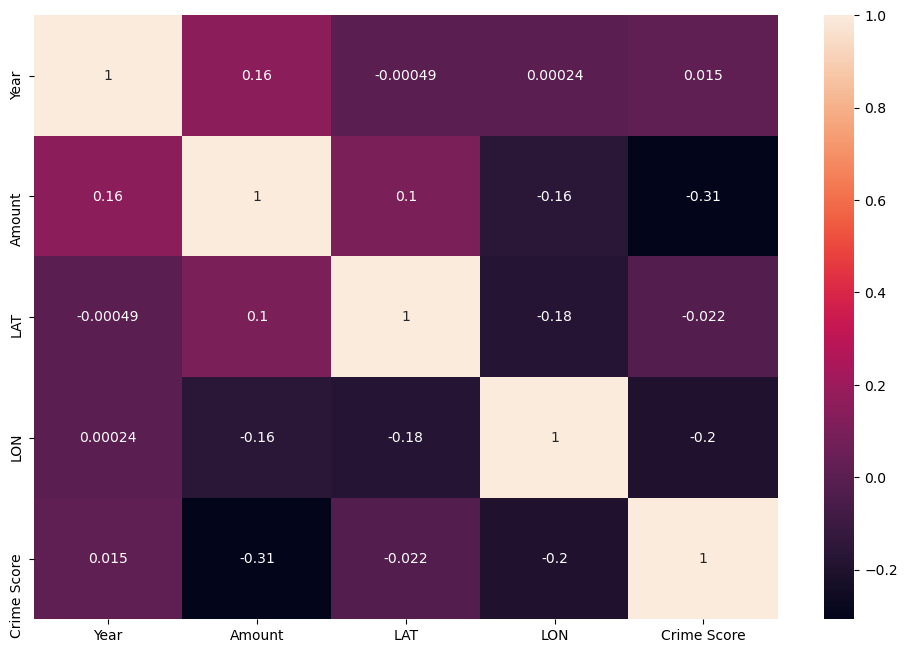

In [6]:
import pandas as pd
import seaborn as sns
dt["Amount"]=dt['Amount'].astype(str).str.replace(",","").astype(float)
dt2=dt.select_dtypes(exclude=["object","category"])
corr1=dt2.corr()
print(corr1)
sns.heatmap(dt2.corr(),annot=True)

|             | Year       | Amount     | LAT        | LON        | Crime    Score |
| ----------- | ---------- | ---------- | ---------- | ---------- | -------------- |
| Year        | 1.000000   | 0.155217   | \-0.000487 | 0.000242   | 0.014742       |
| Amount      | 0.155217   | 1.000000   | 0.101243   | \-0.160303 | \-0.307336     |
| LAT         | \-0.000487 | 0.101243   | 1.000000   | \-0.176024 | \-0.021957     |
| LON         | 0.000242   | \-0.160303 | \-0.176024 | 1.000000   | \-0.196563     |
| Crime Score | 0.014742   | \-0.307336 | \-0.021957 | \-0.196563 | 1.000000       |


The above table shows the correlation between all the features used in prediction. All the correlations in the table are independent of each other. The “Amount” row depicts the correlation between all the independent variables with the dependent variable (amount). Following insights can be drawn from the table:
### Year - Amount:
The year feature has a direct correlation with the amount of rent. This can be observed in a real-life scenario as well, when the rent of a place increases over the years, due to economic factors.
### LAT - Amount: 
As the latitude increases, the rent of the houses increases. This shows that the rent of the houses increases as we move from south to north (within the selected area).
### LON - Amount:
As the longitude decreases, the rent of the houses decreases. This inverse correlation shows that as we move from west to east, the rent of the houses decreases.
### Crime Score - Amount: 
As the crime score increases, the amount/rent of houses decreases considerably. This proves the hypothesis that with an increase in the crime rate, the rent of houses decreases.

## Model Inputs (Training and Testing Data)

For every model that I implement I split the final database into training and testing data where the training data constitutes about 80% and the testing data constitues about 20% of the remaining. 
In order to test the behavior of different algorithms with the library implementation, five different inputs of training data have been used:
### Input 1
Floating Point Values for Latitude and Longitude, including the null values for crime scores. The latitude and longitude are considered as individual input taking a range of values.
### Input 2
Floating Point Values for Latitude and Longitude, excluding the null values for crime scores.
### Input 3
Unique combined categorical for Latitude and Longitude, including the null values for crime scores.
### Input 4
Unique combined categorical for Latitude and Longitude and one-hot encoding for year, including the null values for crime scores.
### Input 5
Unique combined categorical for Latitude and Longitude and one-hot encoding for year, excluding the null values for crime scores.

Testing with different inputs showed the differences in which the algorithm works for continuous floating-point variables as compared to categorical values. Moreover, by using one-hot encoding for the year, the model was given an increased the number of features to train.

In [79]:
from sklearn.metrics import accuracy_score
def float_lat_lon(dataset):    
    x = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    print("Float Lat and Lon - " )
    mae,rmse=regressor(x,y)
    return [mae,rmse]

#--------------------------------------------------------------------------
def float_lat_lon_no_zero_crime(dataset):
    dataset=dataset[dataset["Crime Score"] !=0]
    x = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    print("Float Lat, Lon and no zero crime - " )
    mae,rmse=regressor(x,y)
    return [mae,rmse]

#--------------------------------------------------------------------------
def cat_lat_lon(dataset):
    dataset=dataset[["Year","Crime Score","lat_lon","Amount"]]
    y = dataset.iloc[:, -1].values
    dataset=dataset[["Year","Crime Score","lat_lon"]]
    dataset_onehot= pd.get_dummies(dataset,columns=["lat_lon"])
    x = dataset_onehot.values    
    print("Categorical lat and Lon - ")
    mae,rmse=regressor(x,y)
    return [mae,rmse]

#-----------------------------------------------------------------------------
def cat_lat_lon_year(dataset):
    dataset=dataset[["Year","Crime Score","lat_lon","Amount"]]
    y = dataset.iloc[:, -1].values
    dataset_onehot=dataset[["Year","Crime Score","lat_lon"]].copy()
    dataset_onehot= pd.get_dummies(dataset_onehot,columns=["lat_lon"])
    x = dataset_onehot.values
    # Encoding categorical data
    # Encoding the Independent Variable
    labelencoder_X = LabelEncoder()
    ct_lat_lon_year = ColumnTransformer([('my_lat_lon_year', OneHotEncoder(), [0])], remainder='passthrough')
    x = np.array(ct_lat_lon_year.fit_transform(x), dtype = np.float64)
    x = x[:, 1:]
    print("Categorical Lat, Lon and year - ")
    mae,rmse=regressor(x,y)
    return [mae,rmse]

#-----------------------------------------------------------------------------
def cat_lat_lon_year_no_zero_crime(dataset):
    dataset=dataset[["Year","Crime Score","lat_lon","Amount"]]
    dataset=dataset[dataset["Crime Score"] !=0]
    y = dataset.iloc[:, -1].values
    dataset_onehot=dataset[["Year","Crime Score","lat_lon"]].copy()
    dataset_onehot= pd.get_dummies(dataset_onehot,columns=["lat_lon"])
    x = dataset_onehot.values
    # Encoding categorical data
    # Encoding the Independent Variable
    labelencoder_X = LabelEncoder()
    x[:, 0] = labelencoder_X.fit_transform(x[:, 0])
    ct_lat_lon_year_no_zero_crime = ColumnTransformer([('my_lat_lon_year_no_zero_crime', OneHotEncoder(), [0])], remainder='passthrough')
    x = np.array(ct_lat_lon_year_no_zero_crime.fit_transform(x), dtype = np.float64)
    x = x[:, 1:]
    print("Categorical Lat, Lon, year and no zero crime - ")
    mae,rmse=regressor(x,y)
    return [mae,rmse]

## Models

### 1. Linear Regression
Linear Regression is a supervised learning algorithm developed in the field of statistics and is studied as a model for understanding the relationship between input and output numerical variables. The multiple linear regression used in our work tries to find a linear relationship between a single dependent variable and multiple independent variables. We can understand the algorithm as a multidimensional graph, where a hyperplane of dimensions one less than the graph’s dimension is found having the least variance in total with all the data points in those graphs. There is a trade-off between the variance and bias which the regressor algorithm takes care of.

Linear Regression
Float Lat and Lon - 
Mean Absolute Error:  283.3443847952322
Root Mean Squared Error:  368.166048578953 

Float Lat, Lon and no zero crime - 
Mean Absolute Error:  231.9415920904753
Root Mean Squared Error:  312.90742965724445 

Categorical lat and Lon - 
Mean Absolute Error:  93.39201461795093
Root Mean Squared Error:  161.05114265046325 

Categorical Lat, Lon and year - 
Mean Absolute Error:  93.41384700880879
Root Mean Squared Error:  160.64082152607796 

Categorical Lat, Lon, year and no zero crime - 
Mean Absolute Error:  92.75076626291668
Root Mean Squared Error:  161.96636533696238 



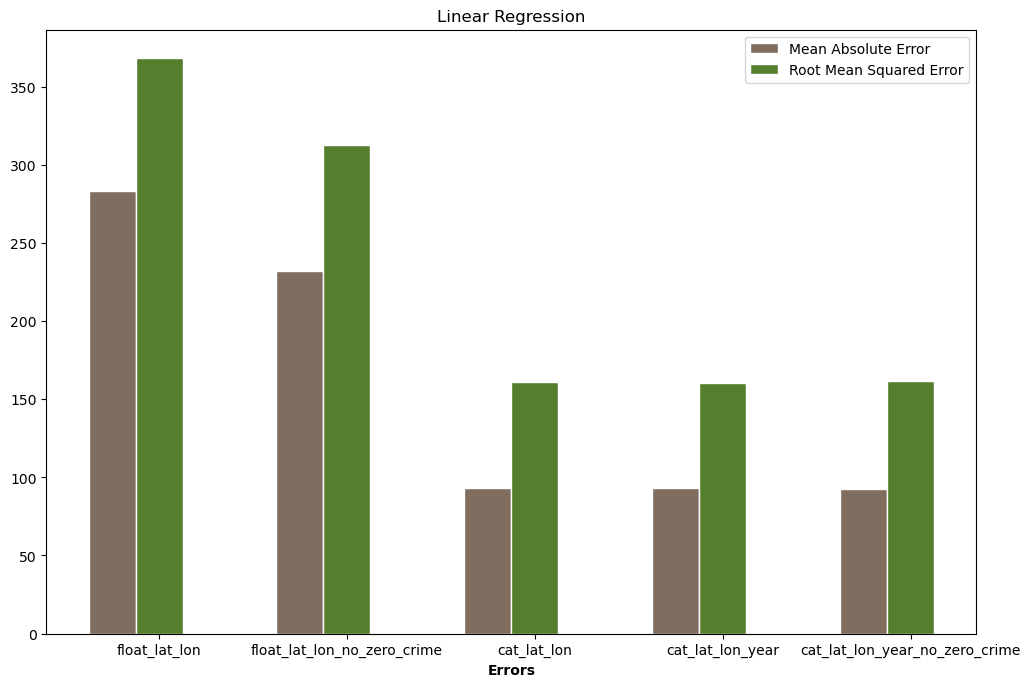

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics 
import warnings
from sklearn.compose import ColumnTransformer

#-----------------------------------------------------------------    
def regressor(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test) 
    mae=metrics.mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error: ",mae)
    print("Root Mean Squared Error: ",rmse,"\n")
    
    return mae,rmse

#-------------------------------------------------------------------------------

def plot_MAE_RMSE(MAE_RMSE):

    MAE_RMSE_list=MAE_RMSE.values()
    MAE=list(map(lambda x:x[0],MAE_RMSE_list))
    RMSE=list(map(lambda x:x[1],MAE_RMSE_list))
    
    barWidth = 0.25
    # Set position of bar on X axis
    r1 = np.arange(len(MAE_RMSE))
    r2 = [x + barWidth for x in r1]
    
    # Make the plot
    plt.bar(r1, MAE, color='#7f6d5f', width=barWidth, edgecolor='white', label='Mean Absolute Error')
            
         
    plt.bar(r2, RMSE, color='#557f2d', width=barWidth, edgecolor='white', label='Root Mean Squared Error')
     
    # Add xticks on the middle of the group bars
    plt.title('Linear Regression')
    plt.xlabel('Errors', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(MAE_RMSE))], MAE_RMSE.keys())
     
    
    
    # Create legend & Show graphic
    plt.legend()
    plt.show()

            
    
#-----------------------------------------------------------
if __name__ == "__main__":
    warnings.simplefilter(action='ignore')
    print("Linear Regression")
    MAE_RMSE={}
    dt=pd.read_csv("Final_Database.csv", usecols=["Year","LAT","LON","Crime Score","Amount"])
    dt["Amount"]=dt['Amount'].astype(str).str.replace(",","").astype(float)
    #dt["Amount"]=dt["Amount"].str.replace(",","").astype(float)
    dataset=dt.dropna()
    dataset=dataset.reindex(columns=["Year","LAT","LON","Crime Score","Amount"])
    MAE_RMSE["float_lat_lon"]=float_lat_lon(dataset)    
    MAE_RMSE["float_lat_lon_no_zero_crime"]=float_lat_lon_no_zero_crime(dataset)    
    
#    ----------------------Convert Categorical---------------
    uniq_loc = {}
    lat_long = np.array(dataset[['LAT', 'LON']])
    cat_label = []
    counter = 1
    for i in lat_long:
        val = tuple(i)
        if val not in uniq_loc:
            uniq_loc[val] = 'L'+str(counter)
            counter += 1
        cat_label.append(uniq_loc[val])
    dataset['lat_lon'] = cat_label
    
    MAE_RMSE["cat_lat_lon"]=cat_lat_lon(dataset)
    MAE_RMSE["cat_lat_lon_year"]=cat_lat_lon_year(dataset)
    MAE_RMSE["cat_lat_lon_year_no_zero_crime"]=cat_lat_lon_year_no_zero_crime(dataset)
    

    plot_MAE_RMSE(MAE_RMSE)


The model was initially trained for all five different inputs. Following are the results obtained for each input:

| Inputs  | Mean Absolute Error | Root Mean Squared Error |
| ------- | ------------------- | ----------------------- |
| Input 1 |       283.344       |        368.166          |
| Input 2 |       231.941       |        312.907          |
| Input 3 |        93.392       |        161.051          |
| <span style='color:red'>Input 4</span> |        <span style='color:red'>93.413</span>       |        <span style='color:red'>160.640</span>          |
| Input 5 |        92.750       |        161.966          |



As seen in the above output graph, the model tends to have low error rates when categorical values are used instead of numerical. This is because, for an instance, the float value of latitude and longitude individually tends to play a role in predicting the amount. While, in our hypothesis, this pair just depicts a location. So, the value change in Latitude and Longitude does not matter, even a 0.1 change is the same as a 1 change. All that matters are, both are different locations.

### 2. Random Forest

Random forest is a Supervised Learning algorithm which uses ensemble bootstrapping learning method for regression problems. It derives the final result from averaging the results of every individual decision tree that is built while training the model. 
This allows users to leverage two major concepts:
1. Random selection of feature points from the training data.
2. Random selection of a subset of the training data.
This random selection ensures that that model does not rely heavily on any specific feature and prevents overfitting by selecting random subsets of the data.


Random Forests
Float Lat and Lon - 
Mean Absolute Error:  93.28852071005919
Root Mean Squared Error: 157.28827072133788 

Float Lat, Lon and no zero crime - 
Mean Absolute Error:  105.39547341115436
Root Mean Squared Error: 175.62913613981934 

Categorical lat and Lon - 
Mean Absolute Error:  184.5767767050763
Root Mean Squared Error: 265.0573541262811 

Categorical Lat, Lon and year - 
Mean Absolute Error:  211.94507318592338
Root Mean Squared Error: 316.35248823255864 

Categorical Lat, Lon, year and no zero crime - 
Mean Absolute Error:  172.4228080415045
Root Mean Squared Error: 259.15138317445303 



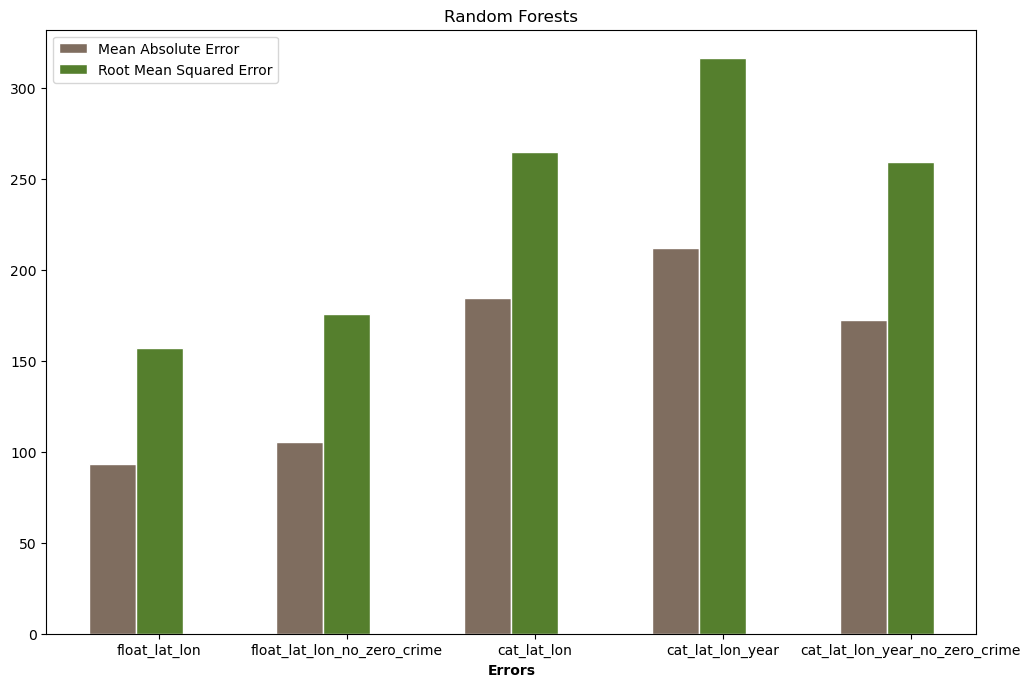

In [56]:
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer

#-----------------------------------------------------------------    
def regressor(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    regressor = RandomForestRegressor(random_state=0)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test) 
    mae=metrics.mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error: ",mae)
    print("Root Mean Squared Error:",rmse,"\n")
    return mae,rmse

#-------------------------------------------------------------------------------

def plot_MAE_RMSE(MAE_RMSE):
    MAE_RMSE_list=MAE_RMSE.values()
    MAE=list(map(lambda x:x[0],MAE_RMSE_list))
    RMSE=list(map(lambda x:x[1],MAE_RMSE_list))
    barWidth = 0.25
    # Set position of bar on X axis
    r1 = np.arange(len(MAE_RMSE))
    r2 = [x + barWidth for x in r1]
    # Make the plot
    plt.bar(r1, MAE, color='#7f6d5f', width=barWidth, edgecolor='white', label='Mean Absolute Error')   
    plt.bar(r2, RMSE, color='#557f2d', width=barWidth, edgecolor='white', label='Root Mean Squared Error') 
    # Add xticks on the middle of the group bars
    plt.title('Random Forests')
    plt.xlabel('Errors', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(MAE_RMSE))], MAE_RMSE.keys())
    # Create legend & Show graphic
    plt.legend()
    plt.show()

def input_tests(dataset):
    MAE_RMSE={}
    MAE_RMSE["float_lat_lon"]=float_lat_lon(dataset)    
    MAE_RMSE["float_lat_lon_no_zero_crime"]=float_lat_lon_no_zero_crime(dataset)    

#    ----------------------Convert Categorical---------------
    uniq_loc = {}
    lat_long = np.array(dataset[['LAT', 'LON']])
    cat_label = []
    counter = 1
    for i in lat_long:
        val = tuple(i)
        if val not in uniq_loc:
            uniq_loc[val] = 'L'+str(counter)
            counter += 1
        cat_label.append(uniq_loc[val])
    dataset['lat_lon'] = cat_label
    
    MAE_RMSE["cat_lat_lon"]=cat_lat_lon(dataset)
#   MAE_RMSE["cat_lat_lon_no_zero_crime"]=cat_lat_lon_no_zero_crime(dataset)    
    MAE_RMSE["cat_lat_lon_year"]=cat_lat_lon_year(dataset)
    MAE_RMSE["cat_lat_lon_year_no_zero_crime"]=cat_lat_lon_year_no_zero_crime(dataset)
    plot_MAE_RMSE(MAE_RMSE)
    
def float_lat_lon_parameter(dataset):  
    x = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    print("Float Lat and Lon - " )
    return x,y

def random_regressor(x,y, random_grid):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    rf = RandomForestRegressor()
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
    rf_random.fit(x_train, y_train)
    reg = rf_random.best_estimator_
    y_pred = reg.predict(x_test)
    mae=metrics.mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error: ",mae)
    print("Root Mean Squared Error: ",rmse,"\n")
    return rf_random.best_params_

def parameter_tests(dataset): 
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    max_features = ['auto', 'sqrt']
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
    x,y = float_lat_lon_parameter(dataset)
    print(random_regressor(x,y,random_grid))
    
#-----------------------------------------------------------
if __name__ == "__main__":
    warnings.simplefilter(action='ignore')
    print("Random Forests")    
    dt=pd.read_csv("Final_Database.csv", usecols=["Year","LAT","LON","Crime Score","Amount"])
    dt["Amount"]=dt['Amount'].astype(str).str.replace(",","").astype(float)    
    dataset=dt.dropna()
    dataset=dataset.reindex(columns=["Year","LAT","LON","Crime Score","Amount"])
    dataset1=dataset.reindex(columns=["Year","LAT","LON","Crime Score","Amount"])
    input_tests(dataset)

The model was initially trained for all five different inputs. Following are the results obtained for each input:

| Inputs  | Mean Absolute Error | Root Mean Squared Error |
| ------- | ------------------- | ----------------------- |
| <span style='color:red'>Input 1</span> |        <span style='color:red'>93.288</span>       |        <span style='color:red'>157.288</span>          |
| Input 2 |       105.395       |        175.629          |
| Input 3 |       184.576       |        312.907          |
| Input 4 |       211.945       |        265.057          |
| Input 5 |       172.422       |        259.151          |


Through the results in the graph and table, it can be observed that keeping the latitude and longitude independent and floating points (input 1) gives us the least root mean squared error. This is because keeping the values as floating points allows the decision trees to use them as continuous values and splits the trees further using more features individually. Hence, the average of these results is more accurate than the results while merging the two latitude and longitude into a discrete categorical value.

In [55]:
dt=pd.read_csv("Final_Database.csv", usecols=["Year","LAT","LON","Crime Score","Amount"])
dt["Amount"]=dt['Amount'].astype(str).str.replace(",","").astype(float)    
dataset=dt.dropna()
dataset=dataset.reindex(columns=["Year","LAT","LON","Crime Score","Amount"])
parameter_tests(dataset)

Float Lat and Lon - 
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   6.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   5.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   6.1s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=  19.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=  18.6s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_sa

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  14.0s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  21.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  21.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  29.0s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  37.4s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  37.1s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  36.9s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=  25.9s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=  19.0s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=  18.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  11.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  11.6s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800,

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=  15.1s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=  39.0s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=  38.5s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=  38.4s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, mi

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=  36.6s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=  35.5s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=  35.4s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=  32.5s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, 

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=  14.9s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=  14.8s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=  50.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=  48.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_esti

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   3.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=  49.6s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=  47.5s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=  47.1s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=600

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=  29.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=  29.1s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=  29.1s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  10.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimato

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 97.4min finished


Mean Absolute Error:  92.70738799661876
Root Mean Squared Error:  156.9803275000395 

{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


The results for the input, floating points for latitude and longitude while keeping the null values for crime weight, gave the lowest root mean squared error. Hence, this input
was used to further tune the parameters of the models by using a randomized search training program. This was a random search of parameters using 3-fold cross validation (cv) while searching across 100 different combinations(n-iter). The total process for hyper-tuning finished in about 100 mins depending on my computation power. Increasing the number of iterations and folds could further improve the results, however, this will also increase the time taken to train the model.
From this randomized search for the best parameters, it was observed that the following parameters yielded the best results:

**Best Parameters:**
{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}

**Results:**
<br> Mean Absolute Error:  92.70738799661876
<br> Root Mean Squared Error:  156.9803275000395 

### 3. Support Vector Regression

Support Vector Regression model is supervised learning algorithm that use the same principle as Support Vector Machines for classification. SVR’s major objective is to find a function that approximates mapping from the input data to real numbers on the basis of a training sample. The motivation behind using SVR is that it provides flexibility to users to define the error range for the given dataset, unlike the case of Linear Regression, where the objective is to minimize the sum of squared errors.

Support Vector Regression
Float Lat and Lon - 
Mean Absolute Error:  268.1091931180304
Root Mean Squared Error:  370.577475331084 

Float Lat, Lon and no zero crime - 
Mean Absolute Error:  242.32330291327884
Root Mean Squared Error:  339.74911252724763 

Categorical lat and Lon - 
Mean Absolute Error:  251.9306837145674
Root Mean Squared Error:  358.09875069784084 

Categorical Lat, Lon and year - 
Mean Absolute Error:  244.7689963865554
Root Mean Squared Error:  351.6116081863841 

Categorical Lat, Lon, year and no zero crime - 
Mean Absolute Error:  244.3480352354633
Root Mean Squared Error:  342.76900175497184 



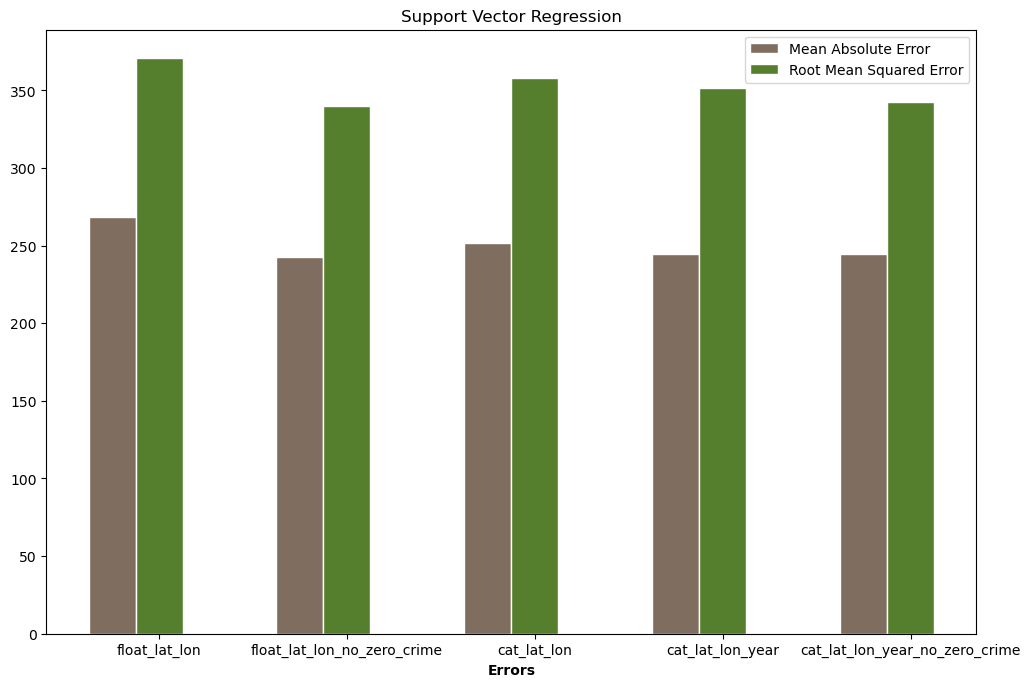

In [47]:
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings



#-----------------------------------------------------------------    
def regressor(x,y):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    regressor = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    #regressor = RandomForestRegressor(random_state=0)
    regressor.fit(x_train, y_train)
    
    
    y_pred = regressor.predict(x_test)
    
    
    mae=metrics.mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error: ",mae)
    print("Root Mean Squared Error: ",rmse,"\n")
    
    return mae,rmse

#-------------------------------------------------------------------------------

def plot_MAE_RMSE(MAE_RMSE):

    MAE_RMSE_list=MAE_RMSE.values()
    MAE=list(map(lambda x:x[0],MAE_RMSE_list))
    RMSE=list(map(lambda x:x[1],MAE_RMSE_list))
    
    barWidth = 0.25
    # Set position of bar on X axis
    r1 = np.arange(len(MAE_RMSE))
    r2 = [x + barWidth for x in r1]
    
    # Make the plot
    plt.bar(r1, MAE, color='#7f6d5f', width=barWidth, edgecolor='white', label='Mean Absolute Error')
            
         
    plt.bar(r2, RMSE, color='#557f2d', width=barWidth, edgecolor='white', label='Root Mean Squared Error')
     
    # Add xticks on the middle of the group bars
    plt.title('Support Vector Regression')
    plt.xlabel('Errors', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(MAE_RMSE))], MAE_RMSE.keys())
     
    
    
    # Create legend & Show graphic
    plt.legend()
    plt.show()       
    
#-----------------------------------------------------------
if __name__ == "__main__":
    warnings.simplefilter(action='ignore')
    print("Support Vector Regression")
    MAE_RMSE={}
    dt=pd.read_csv("Final_Database.csv", usecols=["Year","LAT","LON","Crime Score","Amount"])
    dt["Amount"]=dt['Amount'].astype(str).str.replace(",","").astype(float)
    dataset=dt.dropna()
    dataset=dataset.reindex(columns=["Year","LAT","LON","Crime Score","Amount"])
    MAE_RMSE["float_lat_lon"]=float_lat_lon(dataset)    
    MAE_RMSE["float_lat_lon_no_zero_crime"]=float_lat_lon_no_zero_crime(dataset)    
    
#    ----------------------Convert Categorical---------------
    uniq_loc = {}
    lat_long = np.array(dataset[['LAT', 'LON']])
    cat_label = []
    counter = 1
    for i in lat_long:
        val = tuple(i)
        if val not in uniq_loc:
            uniq_loc[val] = 'L'+str(counter)
            counter += 1
        cat_label.append(uniq_loc[val])
    dataset['lat_lon'] = cat_label
    
    MAE_RMSE["cat_lat_lon"]=cat_lat_lon(dataset) 
    MAE_RMSE["cat_lat_lon_year"]=cat_lat_lon_year(dataset)
    MAE_RMSE["cat_lat_lon_year_no_zero_crime"]=cat_lat_lon_year_no_zero_crime(dataset)

    plot_MAE_RMSE(MAE_RMSE)


The model was initially trained for all five different inputs. Following are the results obtained for each input:

| Inputs  | Mean Absolute Error | Root Mean Squared Error |
| ------- | ------------------- | ----------------------- |
| Input 1 |       268.109       |        370.577          |
| Input 2 |       242.323       |        339.749          |
| Input 3 |       251.930       |        358.098          |
| Input 4 |       244.768       |        351.611          |
| Input 5 |       244.348       |        342.769          |

Through the above results and the graph, it can be observed that the result remains consistent throughout. Giving either floating continuous values or discrete categorical values does not impact the prediction. Hence, they both are treated in the same manner. Moreover, the error parameter (epsilon) was played around with to see if it affects the error rate and this did not yield a major change either.

### 4. Neural Network (Multilayer Perceptron Network)

A multilayer perceptron network is used to capture the potentially non-linear relationship between the location, crime rate and rent prices. Each layer in the network accounts for a linear transformation with a weight matrix and non-linear transformation with an activation function(f(x)).  The transformation from the ith layer to the i+1th layer can be computed as follows:
![title](4.png)
where ![title](5.png) is the input to the next layer, ![title](6.png) is the weight matrix corresponding to layer
i and b is the bias term. 𝑓(. ) is the activation function which corresponds to the non- linear transformation performed at the layer.

#### SETUP: 
To train an MLP over the combined crime and rent dataset, the setup and configuration of the input and the network used is described as follows:

**Activation function:** Standard activation functions include sigmoid, tanh and Rectified Linear Unit. For our setup I have used the ReLU function, which is the result of 𝑓(𝑥) = max (0, 𝑥). For the solver I use ‘adam’, the stochastic gradient descent based optimizer proposed by Kingma, D.P., & Ba, J. (2015). Adam: A Method for Stochastic Optimization. CoRR, abs/1412.6980. This was chosen as it performed better in terms of training time and validation score for the dataset.

**Network Configuration:** The topology of the network was modified over the number of hidden units per layer and the number of layers. Increasing the number of hidden layers above 2 negatively impacted the MAE and RMSE values. Therefore, the number of hidden units was varied over the interval {50,250} for layer 1, {25,75}for layer 2 and the number of layers over {1,2}. The network with 2 hidden layers and 150 and 50 units at each layer was observed to have the least error rate over multiple random splits of the input data. This configuration is used as the final topology for overall comparison. The variation of error rates with number of hidden units per layer is shown.

Float Lat - Long:
Mean Absolute Error-  294.6537505968233
Root Mean Squared Error-  419.29383331792644 

Float Lat-Long No Zero Crime:
Mean Absolute Error-  267.31385930550596
Root Mean Squared Error-  346.8198229147903 

Categorical Lat - Long:
Mean Absolute Error-  114.91396569976085
Root Mean Squared Error-  182.018349853645 

Categorical Lat - Long - Year:
Mean Absolute Error-  86.28894331061203
Root Mean Squared Error-  138.90298786084352 

Categorical Lat - Long - Year no zero crime:
Mean Absolute Error-  98.06204832721751
Root Mean Squared Error-  160.13325071658818 



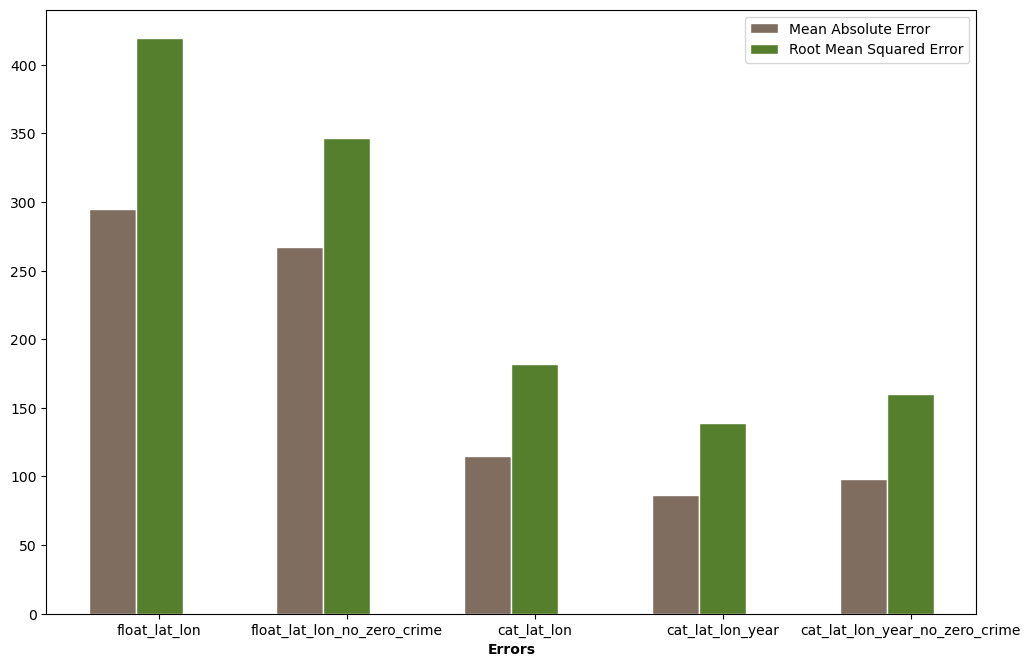

In [97]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


def fit_model(x,y):
    regressor_mlp = MLPRegressor(hidden_layer_sizes=(150, 50,), solver='adam', activation='relu',
                                 learning_rate_init=0.1, max_iter=1000)
    regressor_mlp.fit(x, y)
    return regressor_mlp


def predict(regressor, x, y):
    pred_value = regressor.predict(x)
    return pred_value


def run_regressor(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    regressor = fit_model(x_train, y_train)
    pred_y = predict(regressor, x_test , y_test)
    mae = metrics.mean_absolute_error(y_test, pred_y)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_y))
    print("Mean Absolute Error- ", mae)
    print("Root Mean Squared Error- ", rmse, "\n")
    return [mae, rmse]


def float_lat_lon(dataset):
    x = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    return run_regressor(x,y)


def float_lat_lon_no_zero_crime(dataset):
    dataset = dataset[dataset["Crime Score"] != 0]
    x = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    return run_regressor(x,y)


def cat_lat_lon(dataset):
    dataset = dataset[["Year", "Crime Score", "lat_lon", "Amount"]]
    y = dataset.iloc[:, -1].values
    dataset = dataset[["Year", "Crime Score", "lat_lon"]]
    dataset_onehot = pd.get_dummies(dataset, columns=["lat_lon"])
    x = dataset_onehot.values
    return run_regressor(x,y)


def cat_lat_lon_zero_crime(dataset):
    dataset = dataset[["Year", "Crime Score", "lat_lon", "Amount"]]
    dataset = dataset[dataset["Crime Score"] != 0]
    y = dataset.iloc[:, -1].values
    dataset = dataset[["Year", "Crime Score", "lat_lon"]]
    dataset_onehot = pd.get_dummies(dataset, columns=["lat_lon"])
    x = dataset_onehot.values
    return run_regressor(x,y)


def cat_lat_lon_year(dataset):
    dataset = dataset[["Year", "Crime Score", "lat_lon", "Amount"]]
    y = dataset.iloc[:, -1].values
    dataset_onehot = dataset[["Year", "Crime Score", "lat_lon"]].copy()
    dataset_onehot = pd.get_dummies(dataset_onehot, columns=["lat_lon"])
    x = dataset_onehot.values
    labelencoder_X = LabelEncoder()
    x[:, 0] = labelencoder_X.fit_transform(x[:, 0])
    columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
    x = np.array(columnTransformer.fit_transform(x), dtype=np.float)
    return run_regressor(x,y)


def cat_lat_lon_year_no_zero_crime(dataset):
    dataset=dataset[["Year","Crime Score","lat_lon","Amount"]]
    dataset=dataset[dataset["Crime Score"] !=0]
    y = dataset.iloc[:, -1].values
    dataset_onehot = dataset[["Year", "Crime Score", "lat_lon"]].copy()
    dataset_onehot = pd.get_dummies(dataset_onehot, columns=["lat_lon"])
    x = dataset_onehot.values
    labelencoder_X = LabelEncoder()
    x[:, 0] = labelencoder_X.fit_transform(x[:, 0])
    columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
    x = np.array(columnTransformer.fit_transform(x), dtype=np.float)
    return run_regressor(x, y)


def plot_MAE_RMSE(MAE_RMSE):
    MAE_RMSE_list = MAE_RMSE.values()
    MAE = list(map(lambda x: x[0], MAE_RMSE_list))
    RMSE = list(map(lambda x: x[1], MAE_RMSE_list))
    barWidth = 0.25
    # Set position of bar on X axis
    r1 = np.arange(len(MAE_RMSE))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, MAE, color='#7f6d5f', width=barWidth, edgecolor='white', label='Mean Absolute Error')

    plt.bar(r2, RMSE, color='#557f2d', width=barWidth, edgecolor='white', label='Root Mean Squared Error')

    # Add xticks on the middle of the group bars
    plt.xlabel('Errors', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(MAE_RMSE))], MAE_RMSE.keys())

    # Create legend & Show graphic
    plt.legend()
    plt.show()


if __name__ == "__main__":
    MAE_RMSE = {}
    dt = pd.read_csv("Final_Database.csv", usecols=["Year", "LAT", "LON", "Crime Score", "Amount"])
    #dt["Amount"] = dt["Amount"].str.replace(",", "").astype(float)
    dt["Amount"]=dt['Amount'].astype(str).str.replace(",","").astype(float)
    dataset = dt.dropna()
    dataset = dataset.reindex(columns=["Year", "LAT", "LON", "Crime Score", "Amount"])
    print("Float Lat - Long:")
    MAE_RMSE["float_lat_lon"] = float_lat_lon(dataset)
    print("Float Lat-Long No Zero Crime:")
    MAE_RMSE["float_lat_lon_no_zero_crime"] = float_lat_lon_no_zero_crime(dataset)
    #    ----------------------Convert Categorical---------------
    uniq_loc = {}
    lat_long = np.array(dataset[['LAT', 'LON']])
    cat_label = []
    counter = 1
    for i in lat_long:
        val = tuple(i)
        if val not in uniq_loc:
            uniq_loc[val] = 'L' + str(counter)
            counter += 1
        cat_label.append(uniq_loc[val])
    dataset['lat_lon'] = cat_label
    print("Categorical Lat - Long:")
    MAE_RMSE["cat_lat_lon"] = cat_lat_lon(dataset)
    print("Categorical Lat - Long - Year:")
    MAE_RMSE["cat_lat_lon_year"]=cat_lat_lon_year(dataset)
    print("Categorical Lat - Long - Year no zero crime:")
    MAE_RMSE["cat_lat_lon_year_no_zero_crime"]=cat_lat_lon_year_no_zero_crime(dataset)
    plot_MAE_RMSE(MAE_RMSE)

The model was initially trained for all five different inputs. Following are the results obtained for each input:

| Inputs  | Mean Absolute Error | Root Mean Squared Error |
| ------- | ------------------- | ----------------------- |
| Input 1 |       294.653       |        419.293          |
| Input 2 |       267.313       |        346.819          |
| Input 3 |       114.913       |        182.018          |
| <span style='color:red'>Input 4</span> |        <span style='color:red'>86.288</span>       |        <span style='color:red'>138.902</span>          |
| Input 5 |        98.062       |        160.133          |

As seen in the above output graph and the results, the neural network tends to have low error rates when categorical values are used instead of numerical. This is because, for an instance, the float value of latitude and longitude individually tends to play a role in predicting the amount. While, in our hypothesis, this pair just depicts a location. So, the value change in Latitude and Longitude does not matter, even a 0.1 change is the same as a 1 change. All that matters are, both are different locations.

# Results


As I mentioned before the entire data has been divided into 80% training data and 20% testing data for our five inputs.

The below table shows the Mean Absolute Error for all the models with all the input types. The values marked in red show the least error for that particular algorithm.

|   <span style='color:red'>**MAE**</span>     | **Linear Regression** | **Random Forest** | **Support Vector Regression** | **Neural Network(Multi-Layer Perceptron)** |
| :-----------: | :---------------------: | :-----------------: | :-----------------------------: | :------------------------------------------------: |
| **Input 1** | 283.344               | <span style='color:red'>93.288</span>            | 268.109                       | 294.653                                          |
| **Input 2** | 231.941               | 105.395           | <span style='color:red'>242.323</span>                       | 267.313                                          |
| **Input 3** | 93.392                | 184.576           | 251.930                       | 114.913                                          |
| **Input 4** | 93.413                | 211.945           | 244.768                       | <span style='color:red'>86.288</span>                                           |
| **Input 5** | <span style='color:red'>92.750</span>                | 172.422           | 244.348                       | 98.062                  

The below table shows the Root Mean Squared Error for all the models with all the input types. The values marked in red show the least error for that particular algorithm.

|  <span style='color:red'>**RMSE**   | **Linear Regression** | **Random Forest** | **Support Vector Regression** | **Neural Network(Multi-Layer Perceptron)** |
| :-----------: | :---------------------: | :-----------------: | :-----------------------------: | :------------------------------------------------: |
| **Input 1** | 368.166               | <span style='color:red'>157.288</span>           | 370.577                       | 419.293                                          |
| **Input 2** | 312.907               | 175.629           | <span style='color:red'>339.749</span>                       | 346.819                                          |
| **Input 3** | 161.051               | 312.907           | 358.098                       | 182.018                                          |
| **Input 4** | <span style='color:red'>160.640</span>               | 265.057           | 351.611                       | <span style='color:red'>138.902</span>                                          |
| **Input 5** | 161.966               | 259.151           | 342.769                       | 160.133                                          |

The following insights can be drawn from the above two tables
    
- The Multi-Layer Perceptron works the best, with **input 4** i.e. Unique combined
categorical for Latitude and Longitude and one-hot encoding for year, including the null values for crime scores with MAE equals to 86 and RMSE equals to 140 approximately. When the MAE obtained is compared to the mean of the predicted variable (amount), with mean equal to around 1316, it gives an accuracy of **93.4%**.
- As the dimensions increase, the Linear Regression algorithm and Multi-perceptron Algorithm works better than Random Forest.
- Most of the algorithms have the minimum MAE and RMSE for the same inputs.
- All the algorithms perform well. The **worst case scenario** being the RMSE of around 370 for **SVR** when input is 1. Even this error is not very high compared to the mean of the predicted variable (amount) being around 1316, having an accuracy of around **71.8%**.




# Conclusion

The project focuses on understanding the impact of crime and locality of crime on the rent price followed by development of an effecient model to predict rent prices. The dataset was built using two different data sources, that is, crime data set and rent data set and are merged on the location coordinates. The analysis was conducted using Linear Regression, Random Forests, Support Vector Machines, and Neural Networks. From the results mentioned in the previous section, it can be observed that Neural Networks with 150 hidden layers gives the best prediction with a root squared error of 138.902 and mean absolute error of 86.288. Moreover, it can be observed that increasing the features by on-hot encoding for year and categorizing location coordinates reduces the error rate. Hence, an accuracy of 93.4% was achieved using Multi-Layer Perceptron.

# References


[1] Kingma, D.P., & Ba, J. (2015). Adam: A Method for Stochastic Optimization. CoRR, abs/1412.6980.<br>
[2] Matthew P J Ashby, Comparing Methods for Measuring Crime Harm/Severity, Policing: A Journal of Policy and Practice, Volume 12, Issue 4, December 2018, Pages 439–454, https://doi.org/10.1093/police/pax049<br>
[3] Seya, Hajime & Shiroi, Daiki. (2019). A comparison of apartment rent price prediction using a large dataset: Kriging versus DNN.<br>
[4] McClendon, Lawrence & Meghanathan, Natarajan. (2015). Using Machine Learning Algorithms to Analyze Crime Data. Machine Learning and Applications: An International Journal. 2. 1-12. 10.5121/mlaij.2015.2101<br>
[5] B. Omar, B. Zineb, A. Cortés Jofré and D. González Cortés, "A Comparative Study of Machine Learning Algorithms for Financial Data Prediction," 2018 International Symposium on Advanced Electrical and Communication Technologies (ISAECT), Rabat, Morocco, 2018, pp. 1-5, doi: 10.1109/ISAECT.2018.8618774.<br>
[6] Crime Data from 2010 to 2019 - Provided by Los Angeles Police Department
https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-2019/63jg-8b9z/data<br>
[7] Rent Price (LA) – Provided by American Community Survey, B25064 https://usc.data.socrata.com/Los-Angeles/Rent-Price-LA-/4a97-v5tx <br>

# Appendix A: Crime Score Severity



**Crime Code Description**                                                                                      |**CSS**|**Normalize**
----------------------------------------------------------------------------------------------------------------|-------|-------------
PANDERING                                                                                                       |4      |0.0115       
TELEPHONE PROPERTYDAMAGE                                                                                        |7      |0.0202       
TRAIN WRECKING                                                                                                  |7      |0.0202       
VANDALISM   FELONY                                                                           |7      |0.0202       
DRIVING WITHOUT OWNER CONSENT (DWOC)                                                                            |8      |0.0231       
BATTERY POLICE (SIMPLE)                                                                                         |9      |0.0259       
RESISTING ARREST                                                                                                |10     |0.0288       
VIOLATION OF COURT ORDER                                                                                        |10     |0.0288       
VIOLATION OF RESTRAINING ORDER                                                                                  |10     |0.0288       
VIOLATION OF TEMPORARY RESTRAINING ORDER                                                                        |10     |0.0288       
DISTURBING THE PEACE                                                                                            |10     |0.0288       
FAILURE TO DISPERSE                                                                                             |10     |0.0288       
THROWING OBJECT AT MOVING VEHICLE                                                                               |12     |0.0346       
SHOPLIFTING ATTEMPT                                                                                             |13     |0.0375       
SHOPLIFTING PETTY THEFT                                                                           |14     |0.0404       
SHOPLIFTINGGRAND THEFT                                                                        |15     |0.0432       
VEHICLE    MOTORIZED SCOOTERS, BICYCLES, AND WHEELCHAIRS                                                        |16     |0.0461       
BATTERY SIMPLE ASSAULT                                                                                          |16     |0.0461       
BATTERY ON A FIREFIGHTER                                                                                        |16     |0.0461       
BATTERY WITH SEXUAL CONTACT                                                                                     |16     |0.0461       
DISHONEST EMPLOYEE ATTEMPTED THEFT                                                                              |27     |0.0778       
THEFT PLAIN ATTEMPT                                                                                             |33     |0.0951       
THEFT PLAIN PETTY                                                                                |33     |0.0951       
THEFTGRAND EXCPT,GUNS,FOWL,LIVESTK,PROD|33     |0.0951       
TILL TAPATTEMPT                                                                                                 |33     |0.0951       
TILL TAP GRAND THEFT                                                                           |33     |0.0951       
TILL TAP PETTY                                                                                  |33     |0.0951       
THEFT FROM MOTOR VEHICLEATTEMPT                                                                                 |34     |0.098        
THEFT  FROM MOTOR VEHICLE    GRAND                                                              |34     |0.098        
THEFT FROM MOTOR VEHICLE PETTY                                                                    |34     |0.098        
BURGLARY FROM VEHICLE                                                                                           |34     |0.098        
BURGLARY FROM VEHICLE, ATTEMPTED                                                                                |34     |0.098        
INDECENT EXPOSURE                                                                                               |41     |0.1182       
PEEPING TOM                                                                                                     |41     |0.1182       
DISHONEST EMPLOYEE PETTY THEFT                                                                                  |42     |0.1211       
DRUNK ROLLATTEMPT                                                                                               |43     |0.124        
PICKPOCKET, ATTEMPT                                                                                             |43     |0.124        
PURSE SNATCHINGATTEMPT                                                                                          |43     |0.124        
STALKING                                                                                                        |51     |0.147        
PROWLER                                                                                                         |51     |0.147      
SEX,UNLAWFUL PENETRATION W/ FRGN OBJ|53 |0.1528
SEXUAL PENETRATION W/FOREIGN OBJECT                                              |53 |0.1528
SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERSON TO ANUS OTH                         |53 |0.1528
BEASTIALITY, CRIME AGAINST NATURESEXUAL ASSLT WITH ANIM                         |53 |0.1528
DISHONEST EMPLOYEE GRAND THEFT                                                   |53 |0.1528
ORAL COPULATION                                                                  |53 |0.1528
BRANDISH WEAPON                                                                  |55 |0.1585
REPLICA     FIREARMS |58 |0.1672
FIREARMS RESTRAINING ORDER                                        |58 |0.1672
FIREARMS TEMPORARY RESTRAINING ORDER    |58 |0.1672
BOMB SCARE                                                                       |59 |0.1701
CRIMINAL THREATS NO WEAPON DISPLAYED                                             |59 |0.1701
DOCUMENT WORTHLESS                                                 |69 |0.1989
CHILD NEGLECT                                                   |73 |0.2104
INCITING A RIOT                                                                  |78 |0.2248
THEFT FROM PERSON ATTEMPT                                                        |86 |0.2479
THEFT, PERSON                                                                    |86 |0.2479
CREDIT CARDS, FRAUD USE                                            |86 |0.2479
CREDIT CARDS, FRAUD USE                                         |86 |0.2479
DOCUMENT WORTHLESS                                             |86 |0.2479
DRUNK ROLL                                                                       |86 |0.2479
PICKPOCKET                                                                       |86 |0.2479
PURSE SNATCHING                                                                  |86 |0.2479
DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 &
UNDER                            |98 |0.2825
PETTY THEFT AUTO REPAIR                                                          |99 |0.2854
BUNCO, ATTEMPT                                                                   |112|0.3229
CHILD ABUSE (PHYSICAL) SIMPLE ASSAULT                                            |117|0.3373
RECKLESS DRIVING                                                                 |120|0.3459
FAILURE TO YIELD                                                                 |120|0.3459
BRIBERY                                                                          |123|0.3546
COUNTERFEIT                                                                      |123|0.3546
DEFRAUDING INNKEEPER/THEFT OF SERVICES|123|0.3546
VEHICLE ATTEMPT STOLEN                                                           |124|0.3575
VEHICLE STOLEN                                                                   |124|0.3575
BIKE ATTEMPTED STOLEN                                                            |124|0.3575
BIKE STOLEN                                                                      |124|0.3575
BOAT STOLEN                                                                      |124|0.3575
GRAND THEFT / AUTO REPAIR                                                        |124|0.3575
EMBEZZLEMENT, PETTY THEFT                                          |134|0.3863
CHILD ABANDONMENT                                                                |146|0.4209
CHILD ABUSE AGGRAVATED ASSAULT                                        |146|0.4209
CRM AGNST CHLD  |146 |0.4209
INTIMATE PARTNER SIMPLE ASSAULT                               |147 |0.4238
TRESPASSING                                                   |153 |0.441 
UNAUTHORIZED COMPUTER ACCESS                                  |153 |0.441 
CONSPIRACY                                                    |153 |0.441 
OTHER MISCELLANEOUS CRIME                                     |153 |0.441 
ILLEGAL DUMPING                                               |153 |0.441 
LETTERS,LEWD    TELEPHONE CALLS, LEWD                         |155 |0.4468
BIGAMY                                                        |164 |0.4728
CONTEMPT OF COURT                                             |165 |0.4756
FALSE IMPRISONMENT                                            |165 |0.4756
FALSE POLICE REPORT                                           |165 |0.4756
EMBEZZLEMENT, GRAND THEFT                  |167 |0.4814
CRUELTY TO ANIMALS                                            |175 |0.5045
BUNCO, PETTY THEFT                                            |179 |0.516 
THEFT, COIN MACHINE ATTEMPT                                   |180 |0.5189
THEFT, COIN MACHINE GRAND                     |181 |0.5218
THEFT, COIN MACHINE PETTY                       |182 |0.5246
INTIMATE PARTNER AGGRAVATED ASSAULT                           |184 |0.5304
ARSON                                                         |185 |0.5333
DOCUMENT FORGERY / STOLEN FELONY                              |199 |0.5737
THEFT OF IDENTITY                                             |224 |0.6457
BUNCO, GRAND THEFT                                            |224 |0.6457
GRAND THEFT / INSURANCE FRAUD                                 |224 |0.6457
CHILD STEALING                                                |293 |0.8446
SHOTS FIRED AT INHABITED DWELLING                             |327 |0.9426
DISCHARGE FIREARMS/SHOTS FIRED                                |327 |0.9426
SHOTS   FIRED   AT   MOVING   VEHICLE,    TRAIN   OR AIRCRAFT|328 |0.9455
BURGLARY, ATTEMPTED                                           |350 |1.0089
PIMPING                                                       |370 |1.0666
BURGLARY                                                      |438 |1.2626
RAPE, ATTEMPTED                                               |462 |1.3318
DRUGS, TO A MINOR                                             |497 |1.4327
WEAPONS POSSESSION/BOMBING                                    |635 |1.8305
CHILD ANNOYING                                |709 |2.0438
LEWD/LASCIVIOUS ACTS WITH CHILD                               |709 |2.0438
ROBBERY                                                       |746 |2.1505
ATTEMPTED ROBBERY                                             |746 |2.1505
THREATENING PHONE CALLS/LETTERS                               |803 |2.3148
EXTORTION                                                     |803 |2.3148
CHILD PORNOGRAPHY                                             |870 |2.5079
RAPE, FORCIBLE                                                |923 |2.6607
KIDNAPPING GRAND ATTEMPT                                      |970 |2.7962
ABORTION/ILLEGAL                                              |1020|2.9403
INCEST                   |1046|3.0153
KIDNAPPING                                                    |1213|3.4967
HUMAN TRAFFICKING INVOLUNTARY SERVITUDE                     |1480|4.2664 
HUMAN TRAFFICKING COMMERCIAL SEX ACTS                       |1600|4.6123 
ASSAULT    WITH    DEADLY    WEAPON    ON    POLICE OFFICER|1965|5.6645 
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             |1965|5.6645 
CRIMINAL HOMICIDE                                           |7979|23.0009
MANSLAUGHTER, NEGLIGENT                                     |7979|23.0009
